In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_pickle("../data/reviews_vector.pkl")

In [3]:
X=df[df.columns[4:]]
y=df["binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [21]:
#  with PCA

estimators = [('normalise', StandardScaler()),
              ('model', DecisionTreeClassifier(max_depth=10, random_state=12))]

pipe = Pipeline(estimators, verbose = True)
pipe.fit(X_train, y_train)



[Pipeline] ......... (step 1 of 2) Processing normalise, total=   2.3s
[Pipeline] ............. (step 2 of 2) Processing model, total=  15.7s


Pipeline(steps=[('normalise', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(max_depth=10, random_state=12))],
         verbose=True)

In [16]:

params = {
    'model__max_depth': [5,10,15],
    'model__min_samples_leaf': [3,5,10],
    'model__random_state':[12],
    'normalise': [StandardScaler()]
}

grid_search = GridSearchCV(pipe, param_grid=params, verbose=1, n_jobs=-2)

In [17]:
fittedgrid = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Pipeline] ......... (step 1 of 2) Processing normalise, total=  50.4s
[Pipeline] ......... (step 1 of 2) Processing normalise, total=  51.5s
[Pipeline] ......... (step 1 of 2) Processing normalise, total=  51.7s
[Pipeline] ......... (step 1 of 2) Processing normalise, total=  52.0s
[Pipeline] ......... (step 1 of 2) Processing normalise, total=  52.1s
[Pipeline] ......... (step 1 of 2) Processing normalise, total=  52.4s
[Pipeline] ......... (step 1 of 2) Processing normalise, total=  52.5s
[Pipeline] ......... (step 1 of 2) Processing normalise, total=  52.5s
[Pipeline] ......... (step 1 of 2) Processing normalise, total=  52.6s
[Pipeline] ............. (step 2 of 2) Processing model, total=  36.8s
[Pipeline] ............. (step 2 of 2) Processing model, total=  46.8s
[Pipeline] ............. (step 2 of 2) Processing model, total=  48.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=  49.2s
[Pipeline] ......

In [18]:
fittedgrid.best_estimator_

Pipeline(steps=[('normalise', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(max_depth=15, min_samples_leaf=3,
                                        random_state=12))],
         verbose=True)

In [19]:
fittedgrid.best_score_

0.8233324676600852

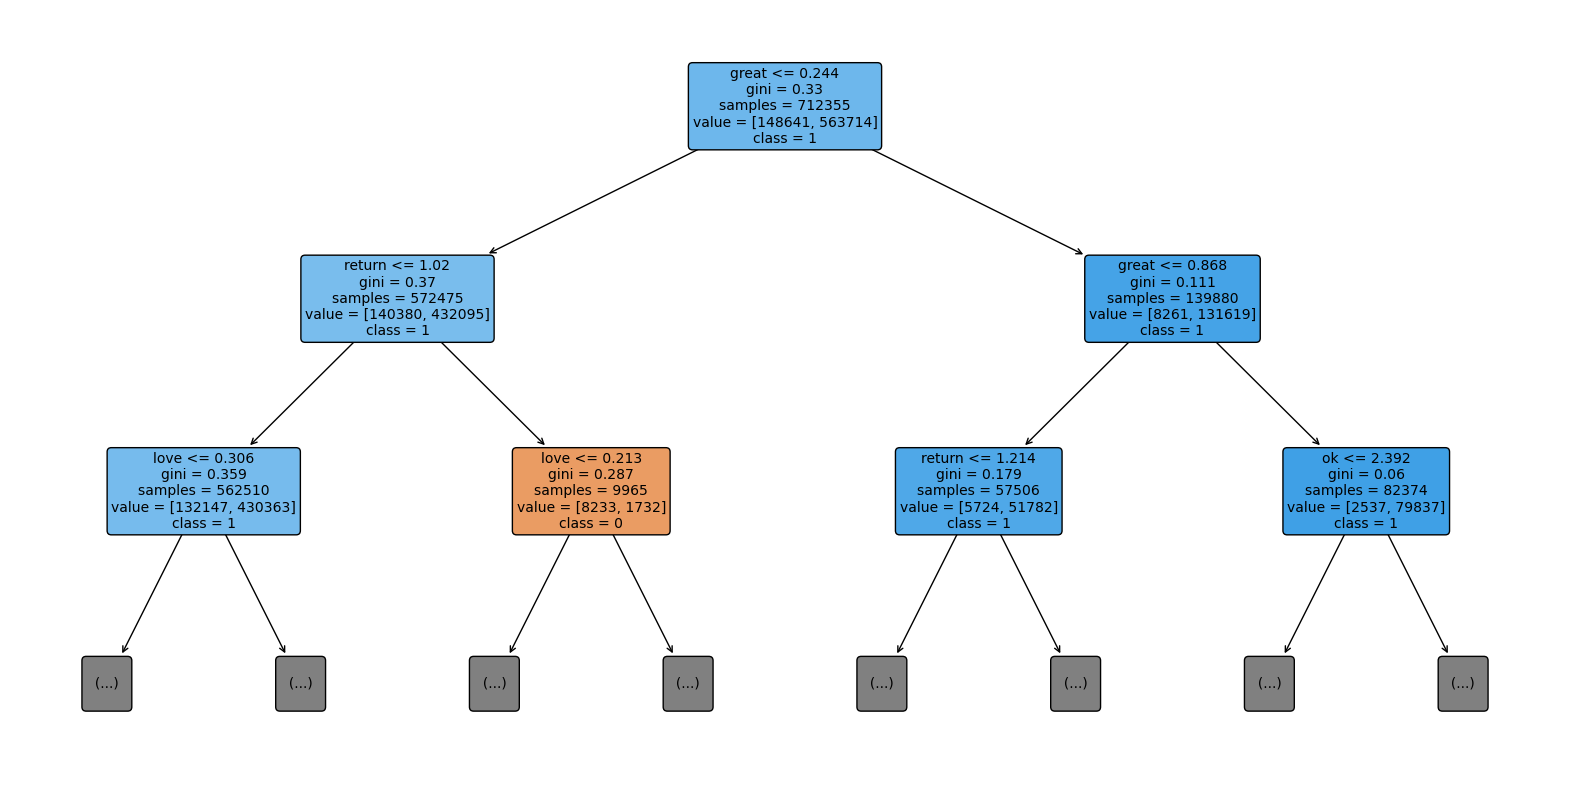

In [24]:
# retrieve the decision tree classifier from the pipeline
decision_tree_classifier = pipe[-1]

plt.figure(figsize=(20, 10))
plot_tree(decision_tree_classifier, max_depth=2, filled=True, feature_names=list(pipe[-2].get_feature_names_out()), class_names=["0","1"], rounded=True)
plt.show()

In [6]:
cross_val_score(pipe, X_train, y_train, cv=5)

[Pipeline] ......... (step 1 of 3) Processing normalise, total=   3.2s
[Pipeline] ........ (step 2 of 3) Processing reduce_dim, total=  19.4s
[Pipeline] ............. (step 3 of 3) Processing model, total=  10.3s
[Pipeline] ......... (step 1 of 3) Processing normalise, total=   3.0s
[Pipeline] ........ (step 2 of 3) Processing reduce_dim, total=  21.5s
[Pipeline] ............. (step 3 of 3) Processing model, total=  10.2s
[Pipeline] ......... (step 1 of 3) Processing normalise, total=   3.1s
[Pipeline] ........ (step 2 of 3) Processing reduce_dim, total=  18.1s
[Pipeline] ............. (step 3 of 3) Processing model, total=  10.2s
[Pipeline] ......... (step 1 of 3) Processing normalise, total=   2.9s
[Pipeline] ........ (step 2 of 3) Processing reduce_dim, total=  20.4s
[Pipeline] ............. (step 3 of 3) Processing model, total=  10.3s
[Pipeline] ......... (step 1 of 3) Processing normalise, total=   3.2s
[Pipeline] ........ (step 2 of 3) Processing reduce_dim, total=  19.3s
[Pipel

array([0.81700135, 0.82329035, 0.8248626 , 0.82190762, 0.82385889])

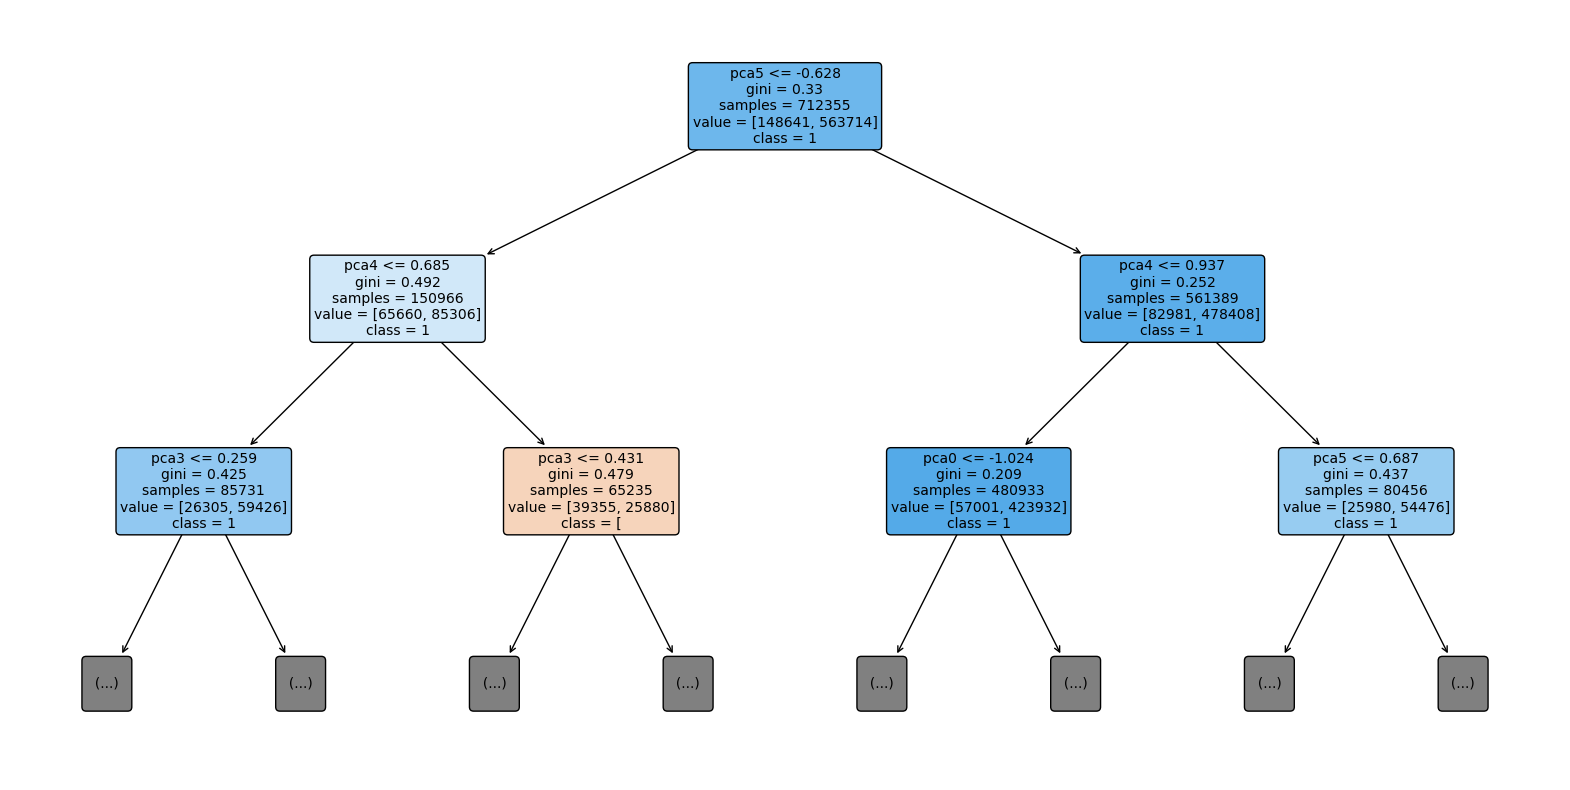

In [7]:
# retrieve the decision tree classifier from the pipeline
decision_tree_classifier = pipe[-1]

plt.figure(figsize=(20, 10))
plot_tree(decision_tree_classifier, max_depth=2, filled=True, feature_names=list(pipe[-2].get_feature_names_out()), class_names=list(str(y_train.unique())), rounded=True)
plt.show()

In [10]:
y_pred_baseline_test= pipe.predict(X_test_transformed)

cm = confusion_matrix(y_test, y_pred_baseline_test, normalize="true")

/Users/edo/anaconda3/envs/es_capstone/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


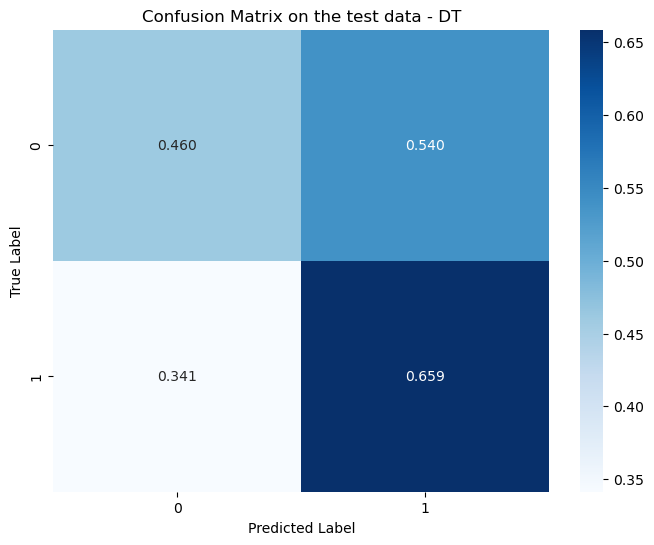

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".3f", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on the test data - DT")
plt.show()